# EDA MC Tuition Assistance Program 

Tuition assistance is funding that the County provides to help an employee pay for education or training the employee chooses to take.

Tuition assistance funds are available to employees with merit system status on a first come, first-served basis until all funding for the fiscal year has been obligated.  Once the funds are depleted for the fiscal year, tuition assistance is not available until the next year.

The courses/trainings must be directly related to:
The employee’s current County job functions or career ladder in the same job series or profession;
A field of study that will prepare the employee to make a career change within the County.

Course(s) must be taken at an accredited college, university or institution as recognized by the United States Department of Education or Higher Education Accreditation Commission.

## Data

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', None) 
pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv('Tuition_Assistance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          3863 non-null   object 
 1   Major               3870 non-null   object 
 2   Degree              3870 non-null   object 
 3   School              3870 non-null   object 
 4   Course Title        3870 non-null   object 
 5   Course Description  3689 non-null   object 
 6   Cost                3870 non-null   float64
dtypes: float64(1), object(6)
memory usage: 211.8+ KB


In [4]:
df.head()

,Department,Major,Degree,School,Course Title,Course Description,Cost
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,An introductory course designed to survey the ...,392.0
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,A general calculus course primarily for busine...,392.0
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,A survey of American popular music from the tu...,392.0
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,Focus is on the analysis of costs and benefits...,1062.0
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organizati...",1569.0


## Variables

- **Department:** Name of the County Department to which the Employee is assigned

- **Major:** Name of a Major to which employee is currently pursuing

- **Degree:** Name of a Degree Program to which the employee is currently enrolled

- **School:** Name of a school/institution where employee took the course(s)

- **Course Title:** Name of a course/seminar/conference taken by the employee

- **Course Decription:** Brief description of the course/seminar/conference taken by the employee

- **Cost:** Price for the course

## Cost EDA

### Cost Distribution

In [62]:
print(f'The avergae of cost of a class: ${round(df.Cost.mean(),2)}')
print(f'The standard deviation of cost of a class: ${round(df.Cost.std(),2)}')

The avergae of cost of a class: $777.78
The standard deviation of cost of a class: $531.45


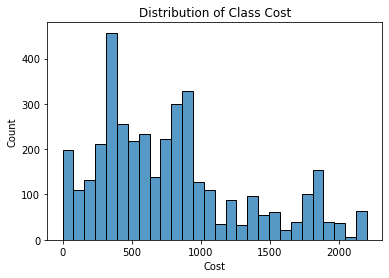

In [36]:
sns.histplot(x = df.Cost).set(title='Distribution of Class Cost')
plt.show()

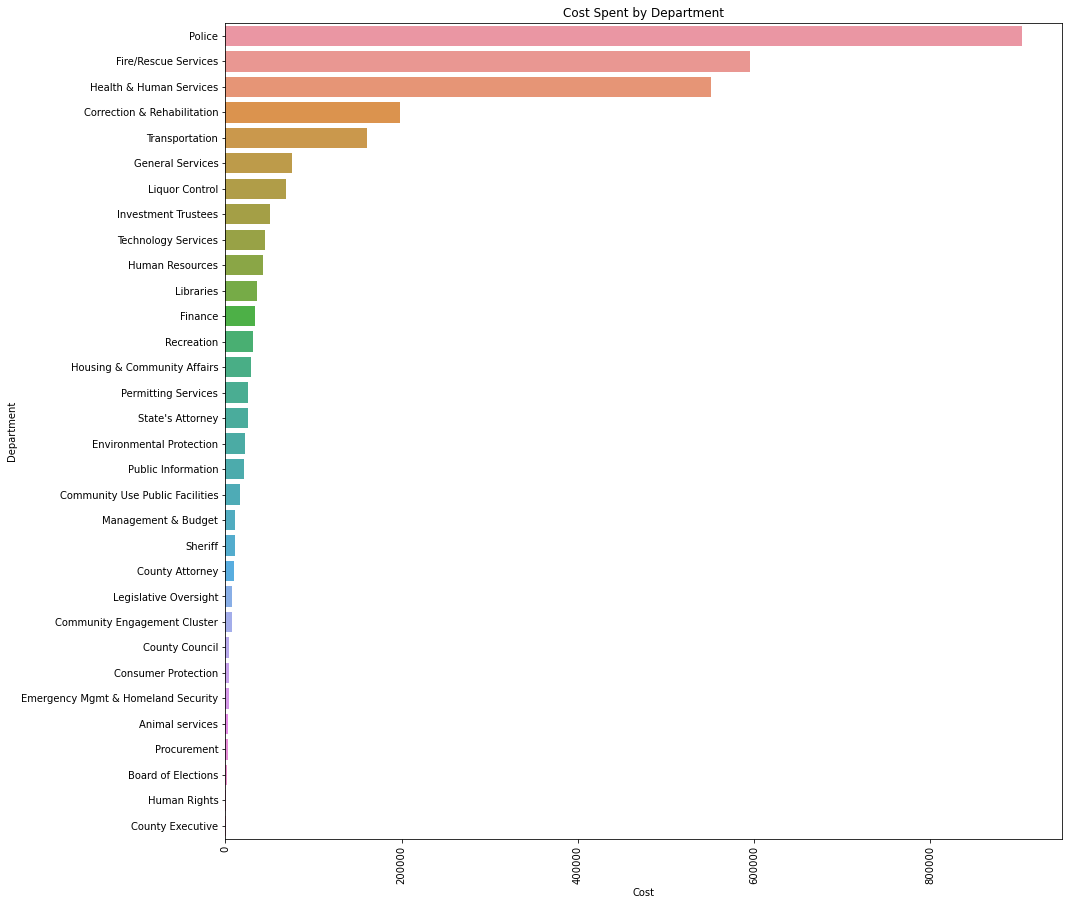

In [56]:
dept_cost = df[['Department','Cost']]
dept_cost = dept_cost.groupby('Department')['Cost'].agg(sum)
dept_cost = dept_cost.sort_values(ascending=False)


plt.figure(figsize = (15,15))
sns.barplot(y =dept_cost.index, x = dept_cost, ci= None).set(title='Cost Spent by Department')
plt.xticks(rotation=90)
plt.show()

## Degree EDA

In [68]:
#Get a count of the number of classes taken for each degree
degree_num = df.Degree.value_counts()
degree_num

Bachelors (BA/BS)           1273
Masters (MA/MS/MPH/etc.)     818
AA                           610
Non-Degree                   453
Certificate                  412
Other                        214
Ph.D. (DCS)                   34
Juris Doctor                  30
Ph.D. (DDE)                   26
Name: Degree, dtype: int64

In [192]:
#Freq table for degree pursued by department
degree_by_dept = df.groupby('Department')['Degree'].value_counts()
degree_by_dept = degree_by_dept.unstack()
#aggregate by row
degree_by_dept = degree_by_dept.apply(lambda x: x/x.sum() ,axis = 1)
degree_by_dept

Degree,AA,Bachelors (BA/BS),Certificate,Juris Doctor,Masters (MA/MS/MPH/etc.),Non-Degree,Other,Ph.D. (DCS),Ph.D. (DDE)
Department,,,,,,,,,
Animal services,NaN,NaN,NaN,NaN,0.142857,0.285714,0.571429,NaN,NaN
Board of Elections,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Community Engagement Cluster,NaN,0.714286,NaN,NaN,0.142857,0.142857,NaN,NaN,NaN
Community Use Public Facilities,0.344828,0.172414,0.413793,NaN,0.034483,0.034483,NaN,NaN,NaN
Consumer Protection,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Correction & Rehabilitation,0.157895,0.416667,0.026316,NaN,0.328947,0.065789,0.004386,NaN,NaN
County Attorney,0.600000,0.320000,NaN,NaN,NaN,0.080000,NaN,NaN,NaN
County Council,NaN,NaN,NaN,0.333333,0.666667,NaN,NaN,NaN,NaN
County Executive,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


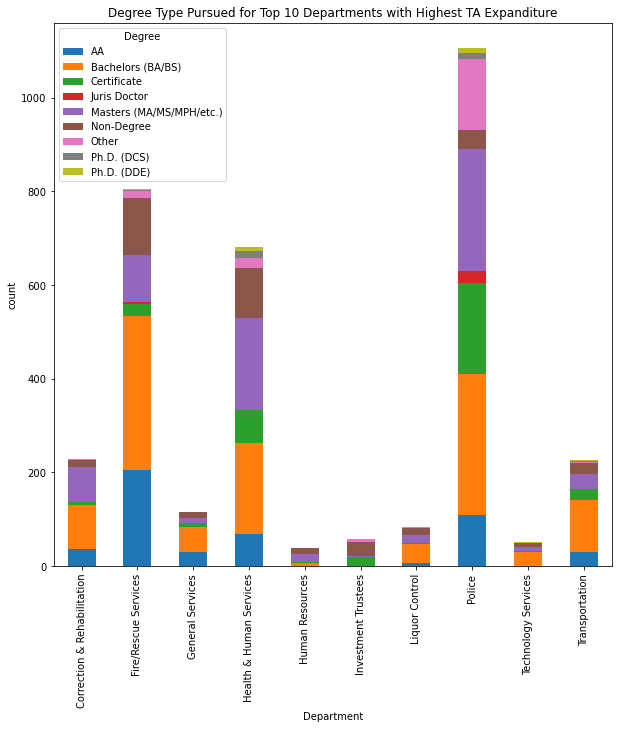

In [196]:
#Subset dataframe for the top 10 departments
top_10 = df.loc[df.Department.isin(dept_cost[:10].index)]
top_10_Degree = top_10.groupby('Department')['Degree'].value_counts()
top_10_Degree = top_10_Degree.unstack()

top_10_Degree.plot(kind='bar', stacked=True, figsize=(10,10), title='Degree Type Pursued for Top 10 Departments with Highest TA Expanditure',
                  ylabel = 'count')
plt.show()

In [143]:
#Major persued for the top 10 schools
top_10_major = top_10.groupby('Department')['Major'].value_counts()
top_10_major = top_10_major.unstack()
#aggergate by row
top_10_major = top_10_major.apply(lambda x: x/x.sum() ,axis = 1)
top_10_major

Major,Accounting (Business),Aerospace Engineering,African-American Studies,Agricultural General,American Studies,Animal Sciences: Animal Care and Management,Architecture,Art Education,Art History,Bioengineering,Biological Sciences: Cell Biology and Genetics,Biological Sciences: General Biology,Business/Admin./Mgmt.,Civil and Environmental Engineering,Communication,Community Health,Computer Engineering,Computer Science,Computer Systems Management,Criminal Justice,Criminology and Criminal Justice,Early Childhood Education,Early Childhood Education,Education (Teacher:Undecided),Electrical Engineering,Emergency Management,Engineering (Undecided),English Language and Literature,Environmental Science and Policy (Science),"Environmental, Educational and Park Management",Family Studies,Finance (Business),Fire Protection Engineering,Fire Science,Foreign Language Education,Forensic Science,French Language and Literature,General Business and Management,General Studies,Geography,Government and Politics,HVAC,Health & Human Services,History,Human Resources,Individual Studies,Information Systems-Business,Information Technology,International Business,Job Related,Kinesiological Sciences,Law,Liberal Arts/Gen. Studies,Linguistics,"Logistics, Transportation and Supply Chain Management (Business)",Marketing (Business),Marketing (Business),Mathematics,Mechanical Engineering,None,Not Listed,Not Specified,Nursing,Nutritional Sciences,Operations Management (Business),Other/Misc.,Paralegal Studies,Physical Education,Pre-Medical Technology,Pre-Nursing,Professional/Technical,Psychology,Public Administration,Public Safety,Romance Languages,Russian Language and Literature,Science Education,Social Studies Education,Social Work,Sociology,Spanish Language and Literature,Undecided (Letters and Sciences),Urban Forestry,Women's Studies
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Correction & Rehabilitation,0.057018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100877,NaN,NaN,NaN,NaN,0.008772,0.004386,0.293860,0.017544,NaN,NaN,NaN,NaN,0.008772,NaN,NaN,NaN,NaN,NaN,0.008772,NaN,NaN,NaN,0.013158,NaN,NaN,0.017544,NaN,0.004386,NaN,0.021930,NaN,0.008772,NaN,0.008772,0.008772,NaN,NaN,NaN,NaN,NaN,0.004386,NaN,NaN,0.008772,NaN,0.017544,0.065789,0.017544,NaN,0.087719,0.052632,NaN,NaN,0.021930,NaN,NaN,NaN,NaN,0.061404,0.030702,NaN,NaN,NaN,NaN,NaN,0.030702,0.013158,0.004386,NaN,NaN,NaN
Fire/Rescue Services,0.019900,NaN,NaN,NaN,NaN,NaN,0.004975,0.001244,NaN,0.001244,NaN,0.006219,0.054726,NaN,0.003731,NaN,0.009950,0.011194,0.002488,0.007463,NaN,NaN,NaN,0.007463,NaN,0.080846,0.003731,NaN,0.004975,0.003731,0.002488,0.004975,0.038557,0.14801,NaN,NaN,0.002488,0.002488,0.034826,0.003731,0.002488,0.006219,0.023632,0.029851,0.001244,NaN,NaN,0.006219,NaN,0.002488,0.002488,NaN,0.003731,NaN,NaN,NaN,NaN,0.007463,0.004975,0.152985,0.039801,0.007463,0.069652,0.004975,NaN,0.038557,NaN,NaN,NaN,NaN,NaN,0.009950,0.033582,0.075871,NaN,0.002488,NaN,NaN,0.011194,0.001244,NaN,NaN,NaN,NaN
General Services,0.103448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163793,NaN,NaN,NaN,NaN,0.017241,0.120690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086207,0.025862,NaN,0.017241,0.034483,NaN,0.008621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103448,0.181034,NaN,NaN,NaN,NaN,0.060345,NaN,NaN,NaN,NaN,0.034483,NaN,NaN,NaN,NaN,NaN,0.025862,NaN,NaN,NaN,NaN,NaN,NaN,0.008621
Health & Human Services,0.026393,NaN,0.007331,NaN,0.001466,NaN,NaN,0.005865,NaN,NaN,0.001466,NaN,0.143695,NaN,0.004399,0.005865,NaN,NaN,NaN,0.019062,NaN,0.01173,0.004399,0.001466,NaN,0.005865,NaN,NaN,0.013196,NaN,0.005865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030792,NaN,NaN,NaN,0.133431,0.004399,0.010264,NaN,0.005865,0.016129,NaN,NaN,NaN,0.001466,0.001466,NaN,0.004399,0.001466,NaN,NaN,NaN,0.156891,0.063050,0.008798,0.063050,0.002933,0.001466,0.016129,0.002933,NaN,NaN,0.011730,NaN,0.082111,0.007331,NaN,NaN,NaN,0.004399,NaN,0.093842,0.014663,0.00293

## School EDA

In [11]:
#number of unique schools
len(pd.Series(df.School).unique())

342

In [158]:
#list of cleaned school names
clean= []

#Convert school names to lower case and remove punctuation
for x in df.School:
    text = x.lower()
    
    if '-' in text:
        text = text.replace('-','')
    elif ',' in text:
        text = text.replace(',','')
        
    if '  ' in text:
        text = text.replace('  ',' ')
    clean.append(text)

#Add column of cleaned school names to df
df['schoolx'] = clean
df.head()

,Department,Major,Degree,School,Course Title,Course Description,Cost,schoolx
0,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRODUCTION TO BUSINESS,An introductory course designed to survey the ...,392.0,montgomery college rockville campus
1,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,MA 160,A general calculus course primarily for busine...,392.0,montgomery college rockville campus
2,Police,Business/Admin./Mgmt.,AA,Montgomery College Rockville Campus,INTRO TO AMERICAN MUSIC,A survey of American popular music from the tu...,392.0,montgomery college rockville campus
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),BOWIE STATE UNIVERSITY,PUBLIC POLICY ANALYSIS,Focus is on the analysis of costs and benefits...,1062.0,bowie state university
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),Mount St Mary's University,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organizati...",1569.0,mount st mary's university


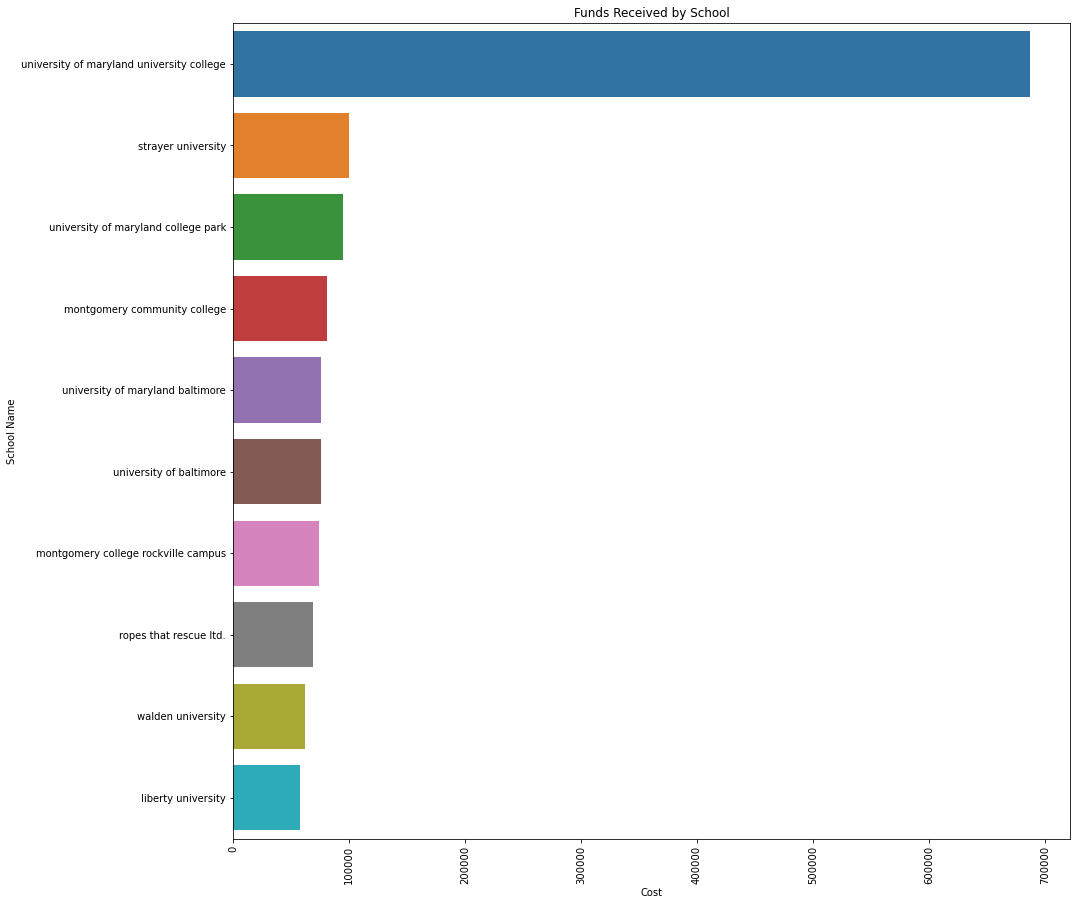

In [197]:
#group by school name to calculate amount of funds received by school
school_funding = df.groupby('schoolx')['Cost'].agg(sum)
#Sort by descending
school_funding = school_funding.sort_values(ascending=False)
#Get the top 10 schools 
top_10_school = school_funding[:10]

plt.figure(figsize = (15,15))
sns.barplot(y =top_10_school.index, x = top_10_school, ci= None).set(title='Funds Received by School', ylabel = 'School Name')
plt.xticks(rotation=90)
plt.show()

In [166]:
#Freq table for degree pursued at schools
school_D = df.groupby(['schoolx','Degree'])['Cost'].agg(sum)
school_D = school_D.unstack()
#Aggregate by Column
school_D = school_D.apply(lambda x: x/x.sum() ,axis = 0)
school_D

Degree,AA,Bachelors (BA/BS),Certificate,Juris Doctor,Masters (MA/MS/MPH/etc.),Non-Degree,Other,Ph.D. (DCS),Ph.D. (DDE)
schoolx,,,,,,,,,
academi,NaN,NaN,0.095060,NaN,NaN,0.004890,0.074136,NaN,NaN
academy of art university,NaN,NaN,NaN,NaN,0.002260,NaN,NaN,NaN,NaN
ace tech institute,NaN,NaN,0.004861,NaN,NaN,0.002250,NaN,NaN,NaN
adelphi university,NaN,0.001934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alice training institute,NaN,NaN,0.001967,NaN,NaN,NaN,NaN,NaN,NaN
alliance francaise dc,NaN,NaN,0.006051,NaN,NaN,NaN,NaN,NaN,NaN
american association of diabetes educators,NaN,NaN,NaN,NaN,NaN,0.002019,NaN,NaN,NaN
american association of diabetes educators (aade),NaN,NaN,0.001967,NaN,NaN,NaN,NaN,NaN,NaN
american college of medical toxicology,NaN,NaN,NaN,NaN,NaN,NaN,0.003478,NaN,NaN


## Interest in Data

In [167]:
mc_certificate = df.loc[(df.Degree == 'Certificate') & (df.School == 'MONTGOMERY COUNTY COMMUNITY COLLEGE')]
#Number classes taken for a certificate at MCCC
len(pd.Series(mc_certificate['Course Title']).unique())

12

In [169]:
mc_certificate

,Department,Major,Degree,School,Course Title,Course Description,Cost,schoolx
108,Transportation,English Language and Literature,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,ENGLISH,Reading & Writing 2,505.0,montgomery county community college
1847,Health & Human Services,Nursing,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,CERTIFIED NURSING ASSISTANT CLASSROOOM,"Through lecture, discussion and hands-on pract...",1000.0,montgomery county community college
1902,Health & Human Services,Nursing,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,CERTIFIED NURSING ASSISTANT CLINICAL,"Through lecture, discussion and hands-on pract...",580.0,montgomery county community college
1999,Fire/Rescue Services,Geography,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,INTRODUCTION TO CARTOGRAPHY,Introduction to geography as a field of study....,947.4,montgomery county community college
2084,Correction & Rehabilitation,Paralegal Studies,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,INTERVIEWING/INVESTIGATING,Introduction to the factors underlying effecti...,366.0,montgomery county community college
2455,Fire/Rescue Services,Geography,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,INTRO TO GEOGRAPHIC INFO SYS,Geographic information systems (GIS) integrate...,759.0,montgomery county community college
2486,Fire/Rescue Services,Geography,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,PRINCIPLES OF MAP DESIGN,Studio/laboratory experience with the applicat...,759.0,montgomery county community college
2514,Health & Human Services,Health & Human Services,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,HHS 105 - PHARMACY TECH CERTIFICATE,The course will prepare students to enter the ...,1380.0,montgomery county community college
3033,Transportation,Health & Human Services,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,CLINAL MEDICAL TECHNOLOGY,Certification for 112 clinical medical,1760.0,montgomery county community college
3607,Libraries,Computer Science,Certificate,MONTGOMERY COUNTY COMMUNITY COLLEGE,ADVANCED PROFESSIONAL WEB TECHNOLOGIES,Explores latest advanced Web technologies and ...,396.0,montgomery county community college


In [170]:
#A list of classes that have data in the title
data_class = []

#Parse through the course titles and add course titles that include 'data' to the data class list 
for x in pd.Series(df['Course Title']).unique():
    if 'DATA' in x:
        data_class.append(x)

print(data_class)
print(len(data_class))

['ADVANCED DATABASE APPLICATION', 'INTRO TO DATABASE MGMT SYSTEM', 'IMPLEMENTING VERSIONED WORKFLOWS IN A MULTIUSER GEODATABASE', 'CELLBRITE CELL PHONE DATA RETREIVAL TRAINING', 'CELL PHONE TECHNOLOGY AND FORENSIC DATA RECOVERY CERTIFICATION', 'EDD 7202: DATA DRIVEN DECISION MAKING', 'USING DATA ANALYSTICS TO DETECT FRAUD', 'STRATEGIC PLANNING FOR DATABASE SYSTEMS', 'CRASH DATA RETRIEVAL SPECIALIST (ANALYST)', 'PHA 6935  APPLIED STATISTICS FOR DATA ANALYSIS', 'RELATIONAL DATABASE', 'DATABASE APPLICATIONS', 'ITMG 516 INTRODUCTION TO DATA ANALYTICS/BUSINESS DATA MINING', 'EXCEL PIVOT TABLES IN DEPHT, POWERPIVOT, AND DATA ANALYSIS FUCTIONS AND TIPS', 'HEALTH DATA MANAGEMENT', 'DATABASE MANAGEMENT SYSTEMS - 54510 - CSIS 325 - D01', 'APPLIED DATA ANALYSIS IN CRIMINAL JUSTICE', 'MICRO MASTERS IN PROJECT MANAGEMENT & DATA SCIENCE (UC SAN DIEGO)', 'IT 530 APPLIED DATABASE SYSTEMS', 'CMSC 350 - DATA STRUCTURES AND ANALYSIS', 'INTRODUCTION TO DATA COMMUNICATION', 'BUS 631 -- DATA-DRIVEN DECISION

In [174]:
#Subset dataframe by courses titles that include data
data_df = df.loc[df['Course Title'].isin(data_class)]
data_df.head() 

,Department,Major,Degree,School,Course Title,Course Description,Cost,schoolx
182,General Services,Computer Systems Management,AA,Montgomery College Rockville Campus,ADVANCED DATABASE APPLICATION,"Intended for the intermediate database user, t...",336.0,montgomery college rockville campus
232,Health & Human Services,Business/Admin./Mgmt.,AA,PRINCE GEORGE'S COMMUNITY COLLEGE,INTRO TO DATABASE MGMT SYSTEM,Introduction to database management techniques...,147.0,prince george's community college
298,Technology Services,None,Non-Degree,Environmental Systems Research Institute (ESRI),IMPLEMENTING VERSIONED WORKFLOWS IN A MULTIUSE...,A successful multiuser editing environment req...,980.0,environmental systems research institute (esri)
371,Police,Criminal Justice,Certificate,"The Newberry Group, Inc",CELLBRITE CELL PHONE DATA RETREIVAL TRAINING,This course covers the proper forensic handlin...,1800.0,the newberry group inc
401,Police,Public Safety,Certificate,PUBLIC AGENCY TRAINING COUNCIL,CELL PHONE TECHNOLOGY AND FORENSIC DATA RECOVE...,NaN,695.0,public agency training council


In [173]:
#Number of class in dataframe
len(data_df)

37

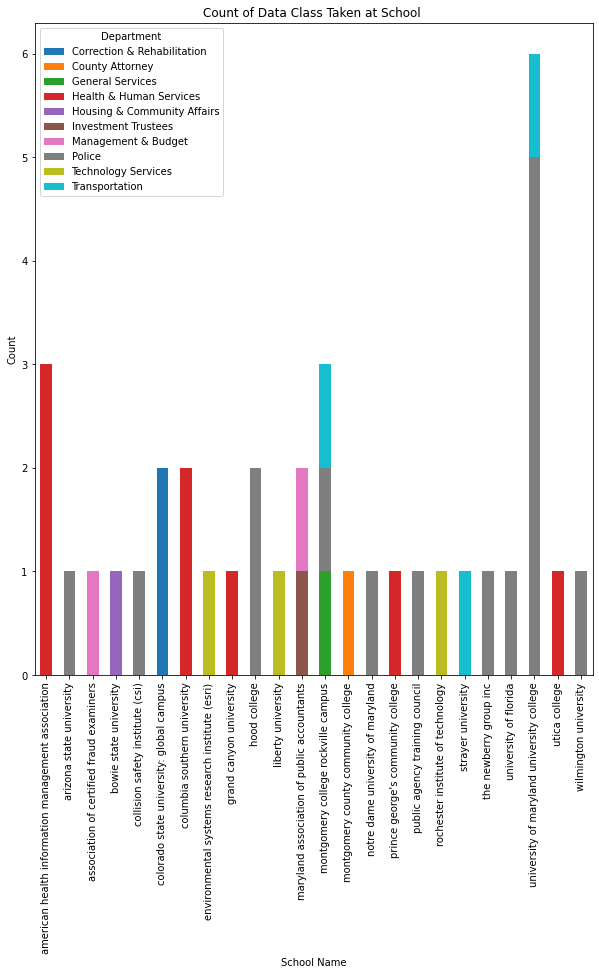

In [198]:
#
data_df_grouped = data_df.groupby('schoolx')['Department'].value_counts()
data_df_grouped = data_df_grouped.unstack()
data_df_grouped
data_df_grouped.plot(kind='bar', stacked=True, figsize=(10,12), title = 'Count of Data Class Taken at School ', 
                     xlabel = 'School Name', ylabel = 'Count')
plt.xticks()
plt.show()

In [190]:
data_df.Degree.value_counts()

Masters (MA/MS/MPH/etc.)    13
Bachelors (BA/BS)            7
Certificate                  6
AA                           5
Non-Degree                   4
Ph.D. (DDE)                  1
Other                        1
Name: Degree, dtype: int64

## References

https://www.montgomerycountymd.gov/HR/CareerDevelopment/TuitionAssistance.html

https://data.montgomerycountymd.gov/Education/Tuition-Assistance/p7z5-tjrz